In [82]:
import requests
import time
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def get_top_movies_per_month(year_list):
        #yearlist = [2020,2019,2040]
        frames = []
        
        for year in year_list:
            for month in range(1,13):
                url = 'https://www.the-numbers.com/movies/report/All/All/All/All/All/All/All/All/All/None/None/{}/{}/{}/{}/None/None/None/None?show-release-date=On&view-order-by=domestic-box-office&view-order-direction=desc&show-domestic-box-office=On&show-genre=On'.format(year, year, month, month)
                html_page = requests.get(url)
                #frames.append(pd.read_html(html_page.text, index_col=0)[0])
                #frames.append(pd.read_html(html_page.text)[0])
                frames.append(pd.read_html(html_page.text, index_col=None)[0])
                
        return pd.concat(frames)

In [3]:
def no_char(col):
    # enter dataframe column to return string of the column back w/o '$' and ','.
    df1 = col
   
    df1 = df1.str.replace('$', '')
    df1 = df1.str.replace(',', '')
    
    return df1

In [4]:
# create a list of years to scrape
year_list = [2020, 2019, 2018, 2017, 2016]

#creates a dataframe of scraped data
df = get_top_movies_per_month(year_list)

In [5]:
#renames column and limits data to movies that made at least a dollar
df = df.rename(columns={"DomesticBox Office":"DomesticBox_Office"})
df = df[df.DomesticBox_Office != "$0" ]

#takes the '$' and ',' out of the string. Example: "$1,200,000" to "12000000"
df["DomesticBox_Office"] = no_char(df["DomesticBox_Office"])

#because there isn't any missing values in DomesticBox_office, we can immediatly change column to int
df['DomesticBox_Office'] = df['DomesticBox_Office'].astype(int)

#sort rows by DomesticBox_Office values
df = df.sort_values("DomesticBox_Office", ascending=False)

#reset index based of rank
df = df.reset_index()

#convert 'Released' column to Datetime to sparse out new columns 'Month' and 'year'
df['Released'] = pd.to_datetime(df['Released'])
df['Month'] = df['Released'].dt.month
df['Year'] = df['Released'].dt.year

#dropping unneccerary columns
df = df.drop("Released", axis=1)
df = df.drop("Unnamed: 0", axis=1)
df = df.drop("index", axis=1)

In [8]:
#exports the cleaned table to a .csv file
#also makes for a nice save point for future work
df.to_csv('Cleaned_movie_data.csv')

In [2]:
# converting .csv to dataframe for future work
df = pd.read_csv('Cleaned_movie_data.csv', index_col = 0)

Everything below this isn't included, I'm not ready to delete code quite yet, 
if you want to delete on your branch, that is more than ok!

=======================================================================

=======================================================================

=======================================================================

========================================================================

========================================================================



In [3]:
#need to add this to data cleaning.....
#Populate Genre nan values to "Other"
df['Genre'] = df['Genre'].fillna("Other")

In [4]:
print(df['DomesticBox_Office'].mean())
print(df['DomesticBox_Office'].median())
print(df['DomesticBox_Office'].std())

17463002.053007517
205525.5
59521562.78803628


In [5]:
df

,Title,Genre,DomesticBox_Office,Month,Year
0,Avengers: Endgame,Action,858373000,4,2019
1,Black Panther,Action,700059566,2,2018
2,Avengers: Infinity War,Action,678815482,4,2018
3,Star Wars Ep. VIII: The Last Jedi,Adventure,620181382,12,2017
4,Incredibles 2,Adventure,608581744,6,2018
...,...,...,...,...,...
2655,Mobile Homes,Drama,449,4,2018
2656,2:22,Thriller/Suspense,422,6,2017
2657,Des nouvelles de la planÃ¨te Mars,Comedy,310,7,2016
2658,Satanic,Horror,252,7,2016


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2660 entries, 0 to 2659
Data columns (total 5 columns):
Title                 2660 non-null object
Genre                 2660 non-null object
DomesticBox_Office    2660 non-null int64
Month                 2660 non-null int64
Year                  2660 non-null int64
dtypes: int64(3), object(2)
memory usage: 124.7+ KB


In [6]:
df['Genre'].unique()

array(['Action', 'Adventure', 'Musical', 'Thriller/Suspense', 'Horror',
       'Drama', 'Romantic Comedy', 'Comedy', 'Western', 'Black Comedy',
       'Concert/Performance', 'Documentary', 'Multiple Genres', 'Other'],
      dtype=object)

In [11]:
df.groupby('Genre').sum()

,DomesticBox_Office,Month,Year
Genre,,,
Action,13098810289,1387,453954
Adventure,13841613956,982,316781
Black Comedy,399532667,231,66587
Comedy,3821228554,1780,570962
Concert/Performance,37029990,113,38346
Documentary,287161161,3420,1032995
Drama,5672882860,5804,1819869
Horror,3334184821,896,292605
Multiple Genres,19240886,67,30264


In [115]:
df.groupby(['Month','Year'])['DomesticBox_Office'].sum()

Month  Year
1      2016     497960814
       2017     417404366
       2018     347983706
       2019     386207536
       2020     435214731
2      2016     656088752
       2017     719265525
       2018    1115830932
       2019     600730613
       2020     473870104
3      2016    1104033652
       2017    1366035185
       2018     783190284
       2019     972346905
       2020     103129373
4      2016     693021106
       2017     505937888
       2018    1217079217
       2019    1276737634
       2020        197974
5      2016     916257734
       2017     856289974
       2018     815125318
       2019    1150203454
       2020       1940924
6      2016    1177362804
       2017    1468145069
       2018    1498076697
       2019     987935570
       2020       2115685
7      2016    1491721426
       2017    1011669426
       2018    1049962541
       2019    1195479547
       2020       4285373
8      2016     826436695
       2017     421634795
       2018     736668098


In [6]:
x = df['Genre'].unique()

In [12]:
data = df.groupby('Genre')['DomesticBox_Office'].sum()

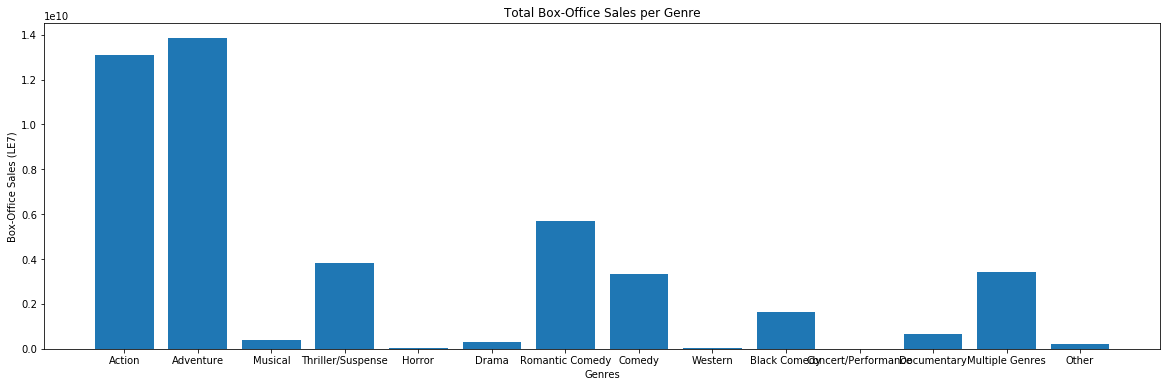

In [15]:
x = df['Genre'].unique()
data = df.groupby('Genre')['DomesticBox_Office'].sum()
fig = plt.figure(figsize=(20,6))

plt.title("Total Box-Office Sales per Genre")
plt.xlabel("Genres")
plt.ylabel("Box-Office Sales (LE7)")


plt.bar(x,data);

plt.show()


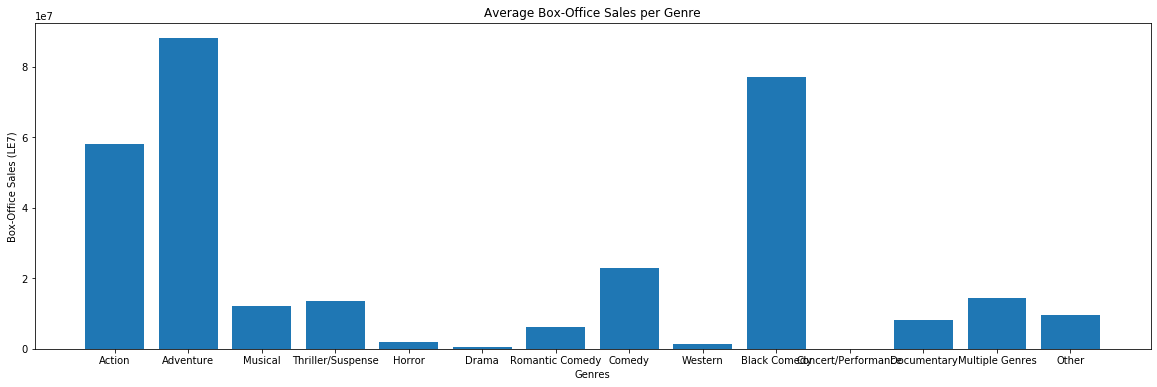

In [14]:
x = df['Genre'].unique()
data = df.groupby('Genre')['DomesticBox_Office'].mean()
fig = plt.figure(figsize=(20,6))

plt.title("Average Box-Office Sales per Genre")
plt.xlabel("Genres")
plt.ylabel("Box-Office Sales (LE7)")


plt.bar(x,data);

plt.show()

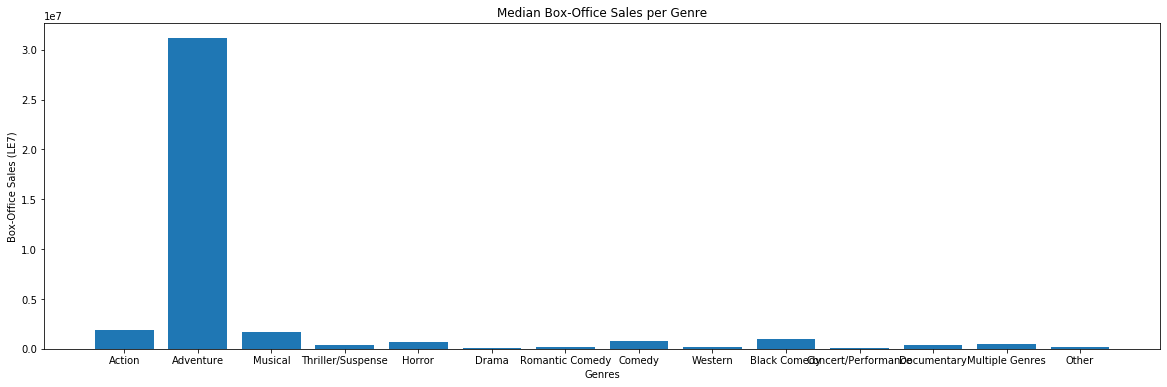

In [16]:
x = df['Genre'].unique()
data = df.groupby('Genre')['DomesticBox_Office'].median()
fig = plt.figure(figsize=(20,6))

plt.title("Median Box-Office Sales per Genre")
plt.xlabel("Genres")
plt.ylabel("Box-Office Sales (LE7)")


plt.bar(x,data);

plt.show()

In [97]:
data2 = df.groupby(['Genre','Month'])["DomesticBox_Office"].mean()

In [98]:
data2

Genre    Month
Action   1        1.914194e+07
         2        7.773837e+07
         3        6.802249e+07
         4        1.113242e+08
         5        1.115868e+08
                      ...     
Western  8        3.885458e+07
         9        1.941475e+07
         10       5.364700e+04
         11       1.029800e+04
         12       1.491348e+07
Name: DomesticBox_Office, Length: 149, dtype: float64

In [102]:
data2["Action"][4]

111324169.84210527

In [109]:
data2['Other']

Month
3       7888.0
5      70088.0
6      25488.0
7     139593.0
9       9345.0
11    179721.0
Name: DomesticBox_Office, dtype: float64

In [113]:
data2['Other'][3]

7888.0

In [62]:
data2[1][0]

19141940.53846154

In [53]:
action = []
adventure = []
blk_com = []
com = []
concert =[]
Doc = []
Drama = []
Horror = []
Multiple = []
Musical =[]
Romance_Com = []
Thriller = []
Wester = []


for month in range(1, 13):
    #print(month)
    for data in range(len(data2[month])):
        if data2[]
        
        

        
        
#['Action', 'Adventure', 'Musical', 'Thriller/Suspense', 'Horror',
 #      'Drama', 'Romantic Comedy', 'Comedy', 'Western', 'Black Comedy',
 #      'Concert/Performance', 'Documentary', 'Multiple Genres', 'Other']
        
    
    
    


0
1
2
3
4
5
6
7
8
9
10
11
12
0
1
2
3
4
5
6
7
8
9
10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
0
1
2
3
4
5
6
7
8
9
10
11
12
0
1
2
3
4
5
6
7
8
9
10
0
1
2
3
4
5
6
7
8
9
10
0
1
2
3
4
5
6
7
8
9
10
11
12
0
1
2
3
4
5
6
7
8
9
10
11
0
1
2
3
4
5
6
7
8
9
10
11
12
0
1
2
3
4
5
6
7
8
9
10
11
12
0
1
2
3
4
5
6
7
8
9
10
11
12
0
1
2
3
4
5
6
7
8
9
10
11


In [22]:
data3 = df.groupby(['Month'])["DomesticBox_Office"].count()
data3

Month
1     185
2     218
3     277
4     240
5     200
6     219
7     189
8     249
9     285
10    258
11    188
12    152
Name: DomesticBox_Office, dtype: int64

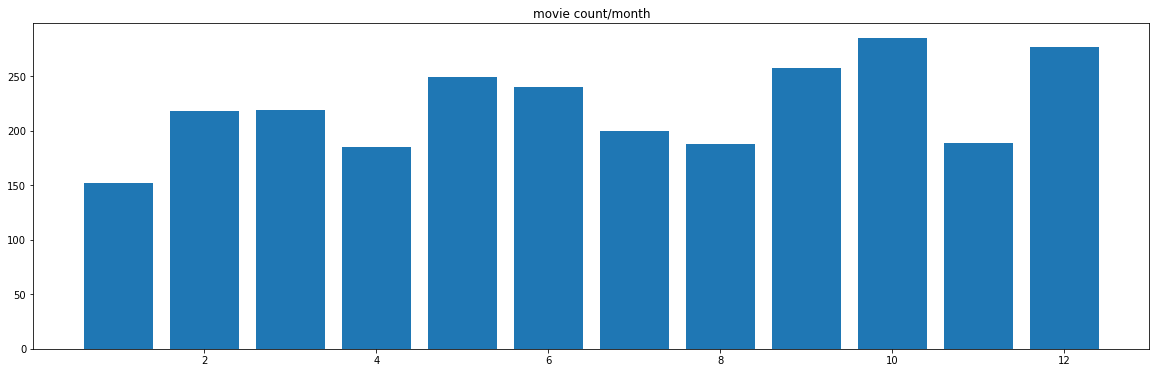

In [24]:
x3 = df['Month'].unique()
fig = plt.figure(figsize=(20,6))

plt.title("movie count/month")
#plt.xlabel("Genres")
#plt.ylabel("Box-Office Sales (LE7)")


plt.bar(x3,data3);

plt.show()

In [46]:
x2 = [data2[1], data2[2], data2[3],
      data2[4], data2[5], data2[6],
      data2[7], data2[8], data2[9],
      data2[10], data2[11], data2[12]]

In [ ]:
#extra functions that i dont want to delete yet.
#=================================================
#=================================================

def get_col_mean(col):
    #"drops na to find avg. col is clean pandas str format"
    df1 = col
    df1 = df1.dropna()
    df1 = df1.astype(int)
    
    return str(int(df1.mean()))


def get_col_median(col):
    #"drops na to find avg. col is clean pandas str format"
    df1 = col
    df1 = df1.dropna()
    df1 = df1.astype(int)
    
    return str(int(df1.median()))


def get_keys(path):
    #get .json file from local machine
    with open(path) as f:
        return json.load(f)
    

def get_movie_info(title, year, api_key):
    #plug in title, year, apikey to return the full api of the selected movie.
    #each api request requires the url and the params (at least the title or the movie id)
    api_url = "http://www.omdbapi.com/?apikey={}".format(api_key)
    params = {
            't' : title,
            'type': 'movie',
            'y' : year
            }
    response = requests.get(api_url, params = params).json()
    return response


def get_movie_search(title, year, api_key):
    api_url = "http://www.omdbapi.com/?apikey={}".format(api_key)
    params = {
            's' : title,
            'type': 'movie',
            'y' : year,
            'plot' : 'full'
            }
    response = requests.get(api_url, params = params).json()
    return response


def get_release_data_list(df1, year, api_key):
    release_month = []
    genre_list = []
    for i in range(1, 6):
    # loop to find the first 20 releash dates
        title = df1['Movie'][i]
        
        
        try:
            a = get_movie_info(title, 2020, api_key)
            
            month = a['Released']
            genre = a['Genre'].split(',')
            
            release_month.append(month)
            genre_list.append(genre)
        except KeyError:
            
            try:
                title_word_list = title.split()
                title = " "
                title = title.join(title_word_list[:2])

                search = get_movie_search(title, year, api_key)
                real_title = search['Search'][0]['Title']

                a = get_movie_info(real_title, 2020, api_key)
                
                month = a['Released']
                genre = a['Genre'].split(',')
                
                release_month.append(month)
                genre_list.append(genre)
                
            except KeyError:
                release_month.append(np.nan)
    
        time.sleep(.5)
        
    release_and_genre_list = [release_month, genre_list]
        
    return release_and_genre_list


In [ ]:
#trash code that i dont want to delete yet
#=================================================
#test two, replacing nan with median
#just playing with data, nothing here meaningful at the moment. (trash code)

#print(df['OpeningWeekendBox Office'].apply(['mean', 'median', 'std']))
#df['OpeningWeekendBox Office'].hist()

#print(df['DomesticBoxOffice'].apply(['mean', 'median', 'std']))
#df['DomesticBoxOffice'].hist()

In [ ]:
# need to change to a remote file location. 
keys = get_keys("/Users/Deric/Documents/Flatiron/phase_One/.secret/omdb_api.json")
api_key = keys['api_key']

In [ ]:
#this cell is just testing my function above. will delete later
title = 'Birds of Prey'
year = 2020

get_movie_search(title, year, api_key)


In [ ]:
# testing functions (will delete later)
z = get_movie_search(title, year, api_key)
z['Search'][0]["Title"]

In [ ]:
# testing functions (will delete later)
a = get_movie_info('Harley Quinn: Birds of Prey', year, api_key)
a['Released']

In [ ]:
# testing functions (will delete later)
get_movie_info('Harley Quinn: Birds of Prey', year, api_key)

In [ ]:
# testing functions (will delete later)
#this cell is just testing my function above.
title = 'Bad Boys For Life'
year = 2020

a = get_movie_info(title, year, api_key)
get_movie_info(title, year, api_key)

In [ ]:
get_release_data_list(df,2020, api_key)
a = get_release_data_list(df,2020, api_key)
a[0]